<a href="https://colab.research.google.com/github/myutiee/3AI1_Mutia_0110224131/blob/main/Praktikum_mandiri07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Praktikum_ML/Praktikum_07/Data/dataset_satelit.csv")
df.head()

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    float64
 20  b5        

In [8]:
df.describe()

,No,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,594.000000,594.000000,594.000000,594.000000,594.000000,593.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,297.500000,106.878644,-1.024933,2.259091,0.141380,0.582175,0.595094,74.613771,308.034697,2.391195,...,0.177291,0.234474,0.102789,28.640422,28.664891,28.609569,0.202587,0.051524,0.269642,0.062320
std,171.617307,4.949840,0.965349,0.395499,0.019782,0.222567,0.366118,55.579655,241.731643,1.580296,...,0.155615,0.070516,0.112310,15.325347,15.380384,15.329170,0.104357,0.012959,0.143728,0.024218
min,1.000000,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,...,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,149.250000,102.927811,-2.233338,1.982500,0.130000,0.429000,0.320000,40.705000,124.015000,1.172500,...,0.046925,0.183210,0.039535,31.959745,31.968948,33.685353,0.183085,0.040250,0.244935,0.052772
50%,297.500000,103.581969,-0.602276,2.280000,0.140000,0.549000,0.540000,65.650000,239.445000,2.225000,...,0.072700,0.213385,0.046550,35.067930,35.110415,34.611565,0.233590,0.050415,0.310380,0.068380
75%,445.750000,113.403797,-0.257349,2.570000,0.150000,0.710000,0.790000,87.372500,434.990000,3.357500,...,0.318900,0.262242,0.059190,38.319135,38.441065,39.002760,0.271790,0.060410,0.364505,0.079020
max,594.000000,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,...,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620


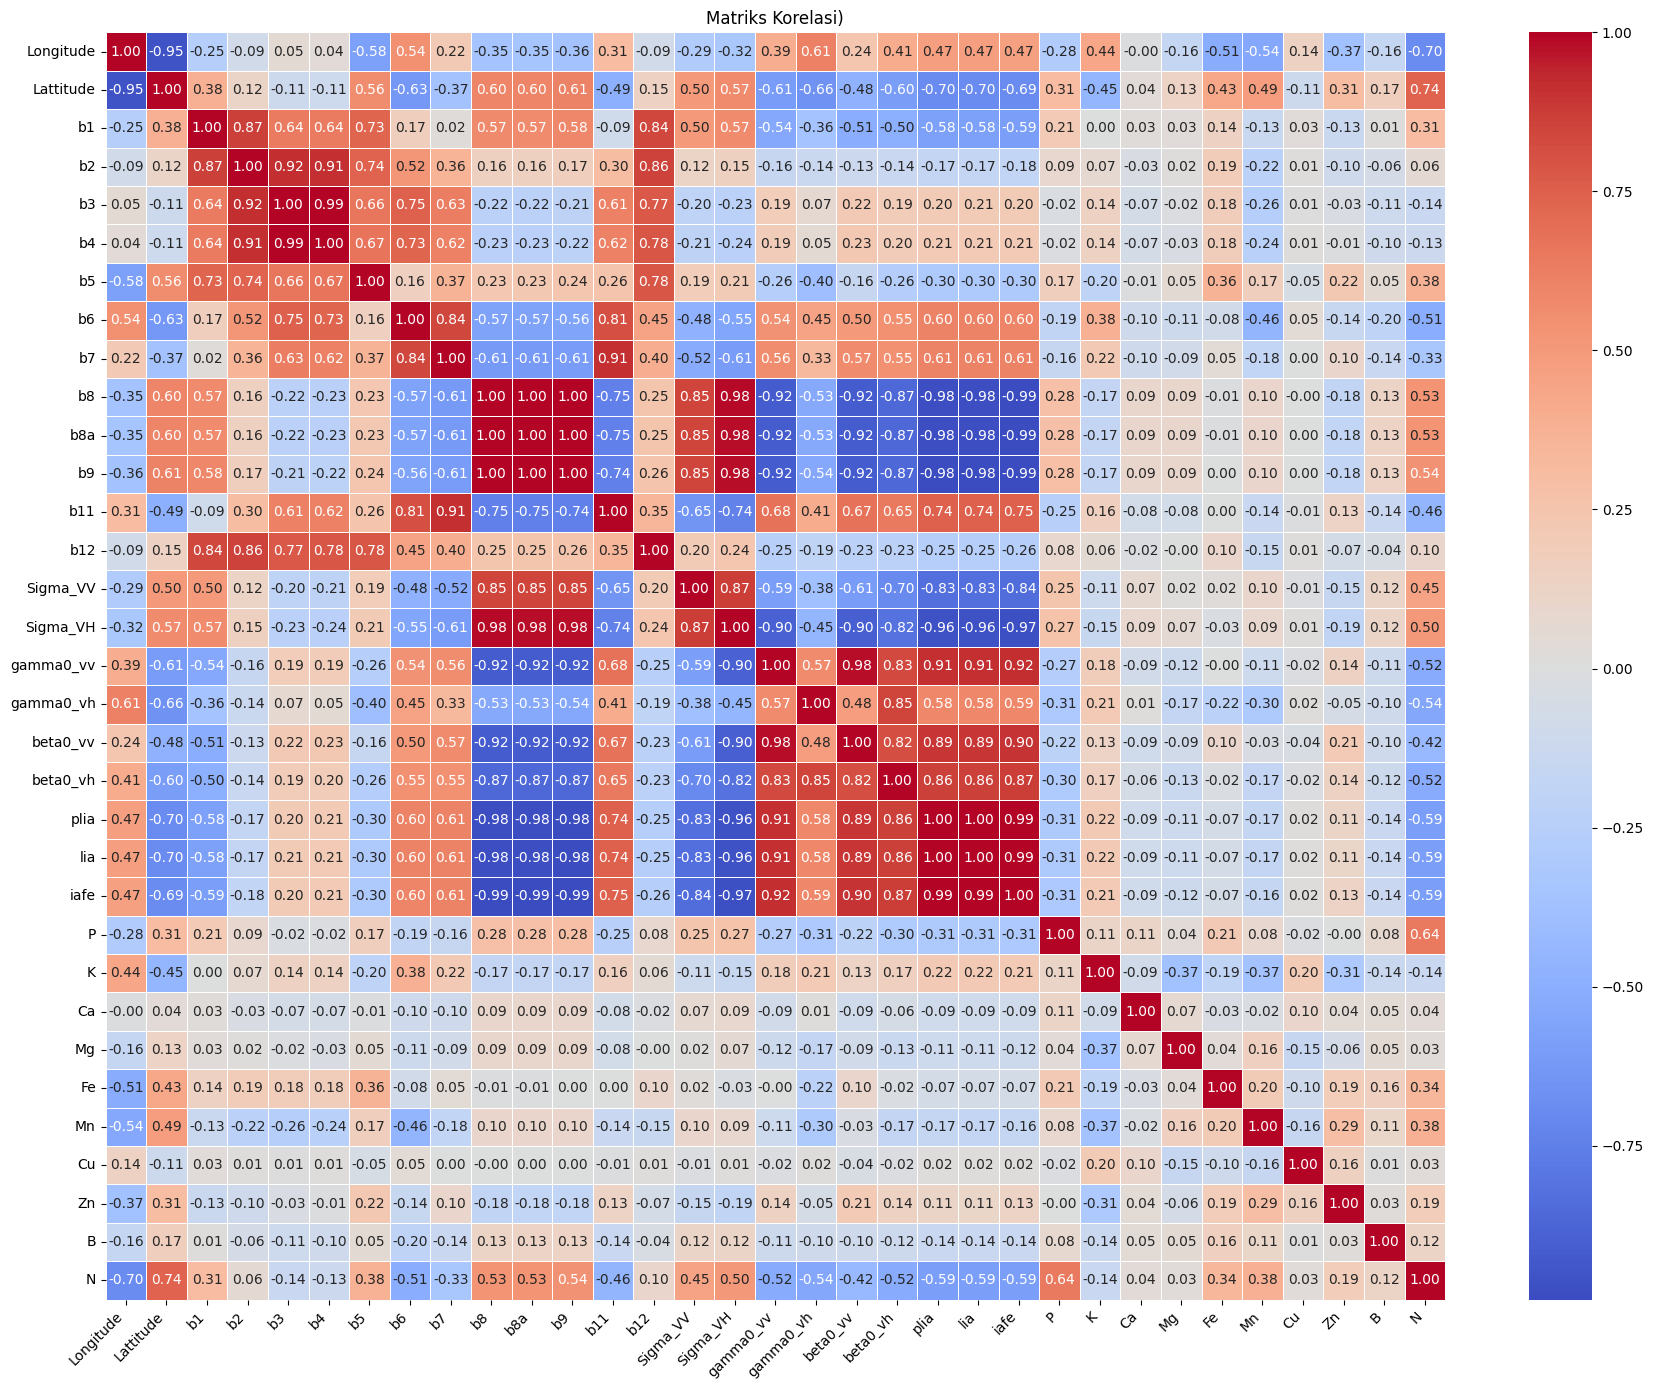

In [9]:
# Ubah Mg menjadi numerik
df['Mg'] = df['Mg'].replace({')': np.nan}).astype(float)

df_coll = ["Longitude", "Lattitude",
           "b1", "b2", "b3", "b4", "b5", "b6", "b7", "b8", "b8a", "b9", "b11", "b12",
           "Sigma_VV", "Sigma_VH", "gamma0_vv", "gamma0_vh", "beta0_vv", "beta0_vh",
           "plia", "lia", "iafe",
           "P", "K", "Ca", "Mg", "Fe", "Mn", "Cu", "Zn", "B", "N"]

df_selected = df[df_coll]

# Hitung korelasi antar kolom yang dipilih
corr_matrix = df_selected.corr()

plt.figure(figsize=(18, 14))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=.5
)
plt.title("Matriks Korelasi)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [10]:
#menentukan target dan fitur
target = "N"
features = [ "P", "b5", "b8", "b9", "Sigma_VV", "Sigma_VH",
            "gamma0_vv", "beta0_vh", "Mn", "Fe"]

X = df[features]
y = df[target]

In [11]:
#Melakukan pembagian data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
#Melatih model dengan random forest
rf_model = RandomForestRegressor(
    n_estimators=200, random_state=42
)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred = rf_model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(" HASIL EVALUASI RANDOM FOREST")
print(f"R² (Akurasi): {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

🔍 HASIL EVALUASI RANDOM FOREST
R² (Akurasi): 0.718
MAE: 0.156
RMSE: 0.206


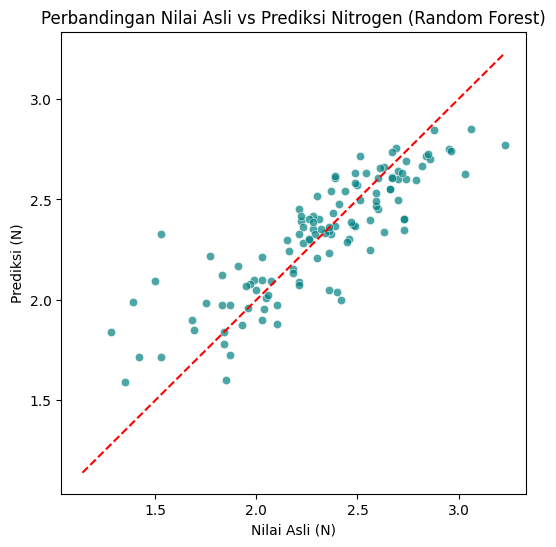

In [14]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, color="teal", alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Nilai Asli (N)")
plt.ylabel("Prediksi (N)")
plt.title("Perbandingan Nilai Asli vs Prediksi Nitrogen (Random Forest)")
plt.show()

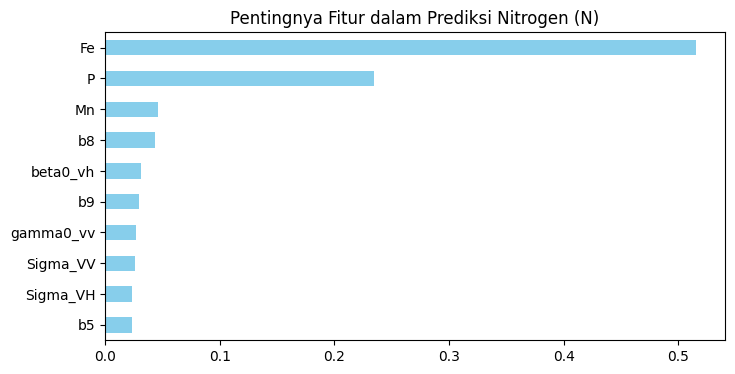

In [15]:
feature_importance = pd.Series(rf_model.feature_importances_, index=features)
feature_importance.sort_values(ascending=True).plot(kind='barh', color='skyblue', figsize=(8,4))
plt.title("Pentingnya Fitur dalam Prediksi Nitrogen (N)")
plt.show()

In [19]:
X_sm = sm.add_constant(X)
model_ols = sm.OLS(y, X_sm).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      N   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     137.7
Date:                Sat, 08 Nov 2025   Prob (F-statistic):          2.49e-146
Time:                        09:39:13   Log-Likelihood:                 68.734
No. Observations:                 594   AIC:                            -115.5
Df Residuals:                     583   BIC:                            -67.21
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6921      0.106      6.546      0.0